<a href="https://colab.research.google.com/github/Srawik/AIML_LAB-3/blob/main/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
t=pd.read_csv("framingham.csv")
print(t)
t1=t.describe()
print(t1)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [2]:
dt=t.dtypes
shape=t.shape
print("t types of each column:\n",dt)
print("Shape:",shape)

t types of each column:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
Shape: (4238, 16)


In [3]:
nullvalues=t.isnull()
print(nullvalues)
t_mean=t.fillna(0)
print(t_mean)

       male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0     False  False      False          False       False   False   
1     False  False      False          False       False   False   
2     False  False      False          False       False   False   
3     False  False      False          False       False   False   
4     False  False      False          False       False   False   
...     ...    ...        ...            ...         ...     ...   
4233  False  False      False          False       False   False   
4234  False  False      False          False       False   False   
4235  False  False      False          False       False    True   
4236  False  False      False          False       False   False   
4237  False  False      False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0               False         False     False    False  False  False  False   
1               False    

In [4]:
X = t.drop(columns=["TenYearCHD"])
y = t["TenYearCHD"]

print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0  

Target (y):
 0    0
1    0
2    0
3    1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (3390, 15)
Test set shape: (848, 15)


Accuracy: 73.03%
Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



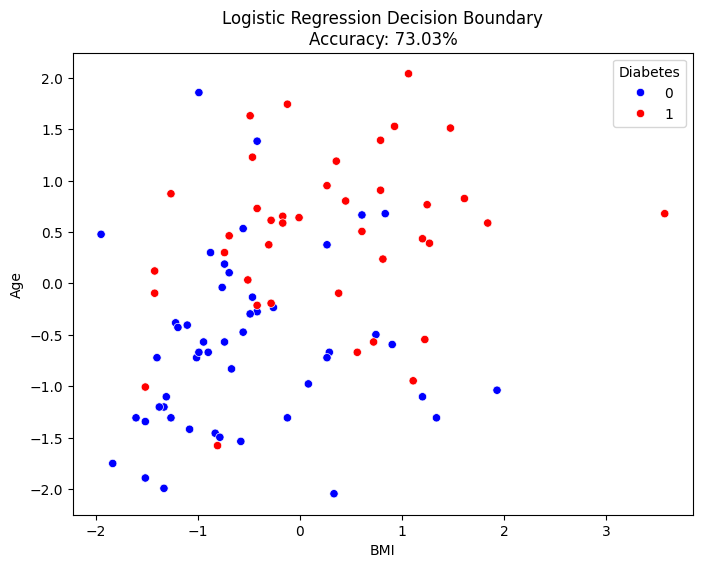

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
    accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()

Logistic Regression Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall: 0.725
F1-score: 0.7073170731707318
Confusion Matrix:
[[36 13]
 [11 29]]


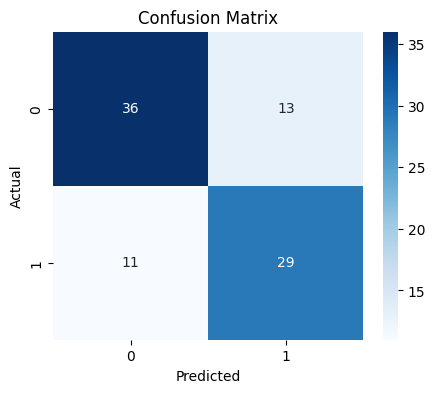

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall: 0.725
F1-score: 0.7073170731707318
Confusion Matrix:
[[36 13]
 [11 29]]


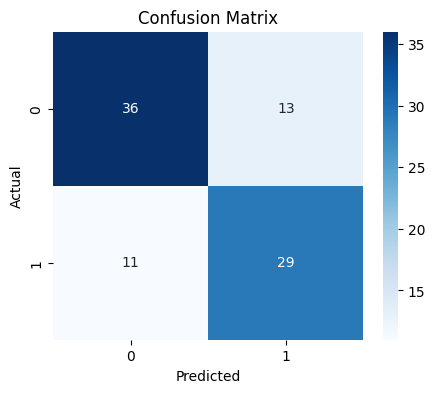

In [8]:

model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN Accuracy: 0.6966292134831461
Confusion Matrix:
[[34 15]
 [12 28]]
Precision: 0.6511627906976745
Recall: 0.7
F1-score: 0.674698795180723
Confusion Matrix:
[[34 15]
 [12 28]]


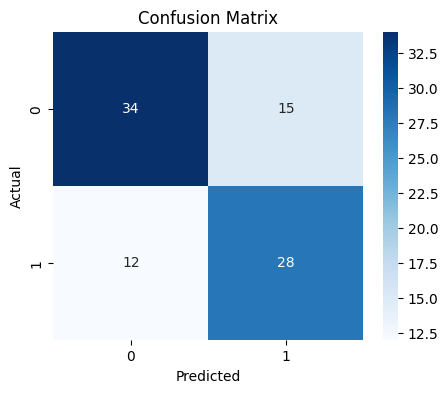

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.7303370786516854
Precision: 0.6818181818181818
Recall: 0.75
F1-score: 0.7142857142857143
Confusion Matrix:
[[35 14]
 [10 30]]


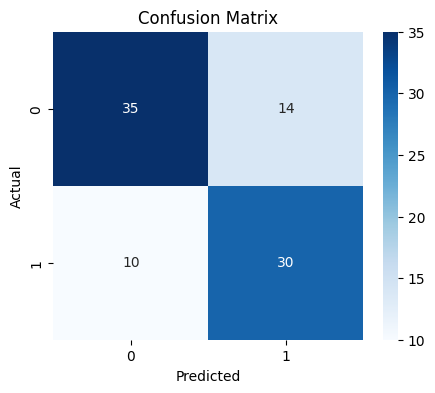

In [10]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

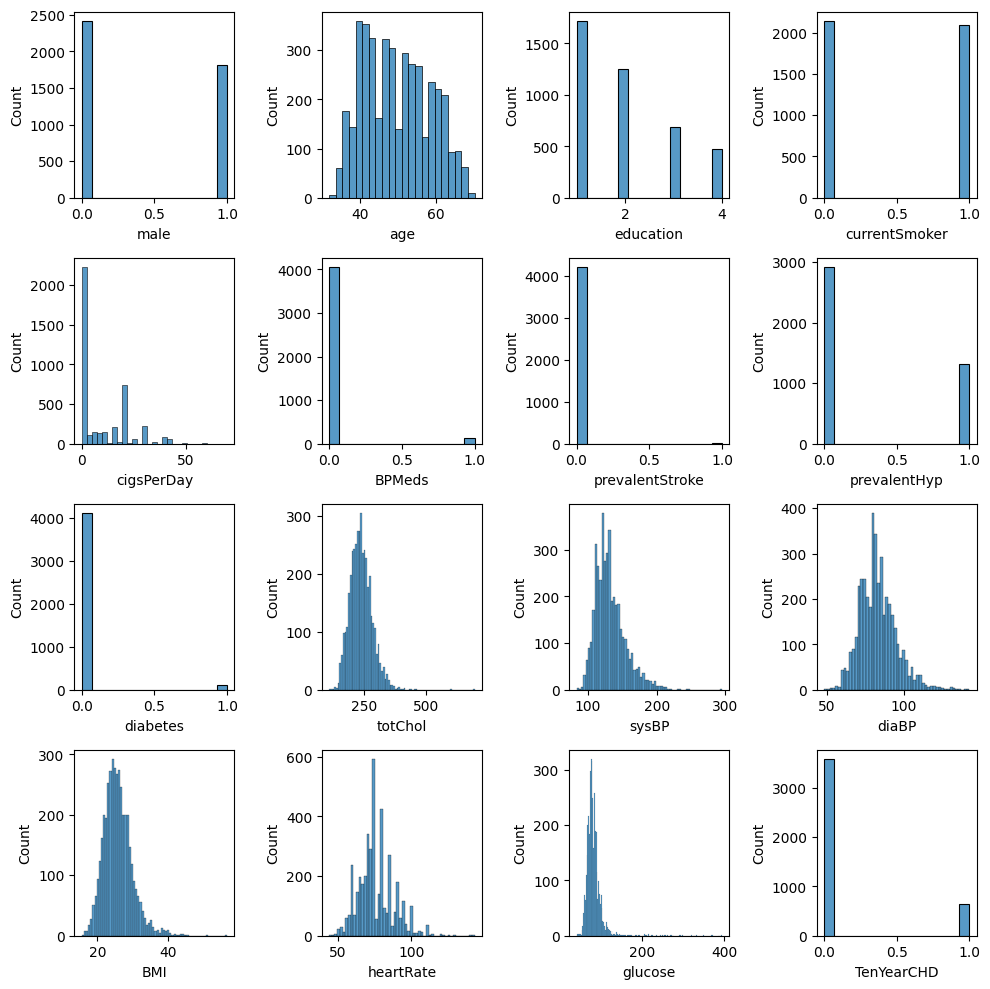

In [11]:
plt.figure(figsize=(10,10))
data = pd.read_csv("framingham.csv")
plotnumber = 1
for column in data:
    plt.subplot(4,4,plotnumber)
    sns.histplot(x=data[column])
    plotnumber += 1

plt.tight_layout()

<Axes: xlabel='cigsPerDay', ylabel='Count'>

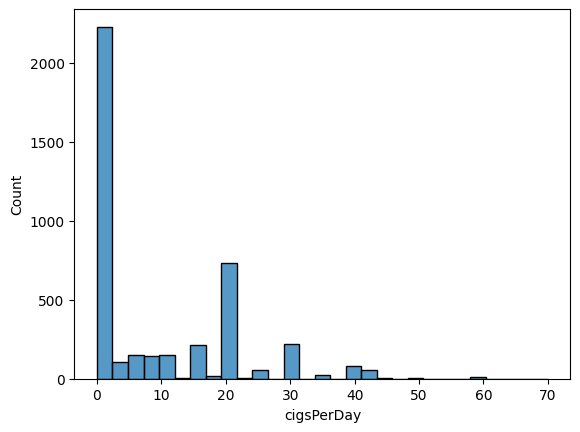

In [12]:
sns.histplot(data['cigsPerDay'])

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

data = pd.read_csv("framingham.csv")
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

Random Forest Results:
Accuracy: 0.7415730337078652
Precision: 0.6976744186046512
Recall: 0.75
F1 Score: 0.7228915662650603
Confusion Matrix:
[[36 13]
 [10 30]]


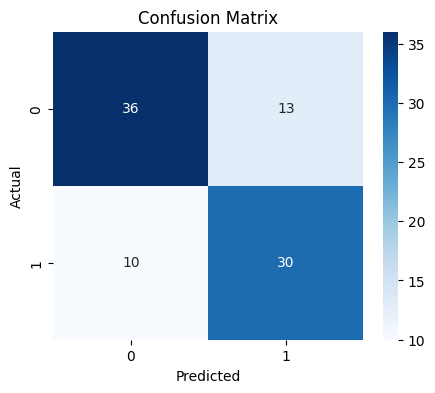

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# ... (same code as before)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print the results
print("Random Forest Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
data = pd.read_csv("framingham.csv")
# Impute missing values
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
# Separate features and target variable
X = data_imputed.drop(columns=["TenYearCHD"])  # Features
y = data_imputed["TenYearCHD"]  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)
conf_matrix = confusion_matrix(y_test, y_pred_ada)

# Print the results
print("AdaBoost Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

AdaBoost Metrics:
Accuracy: 0.8537735849056604
Precision: 0.5
Recall: 0.08870967741935484
F1 Score: 0.1506849315068493
Confusion Matrix:
[[713  11]
 [113  11]]


AdaBoost Results:
Accuracy: 0.8537735849056604
Precision: 0.5
Recall: 0.0967741935483871
F1 Score: 0.16216216216216214
Confusion Matrix:
[[712  12]
 [112  12]]


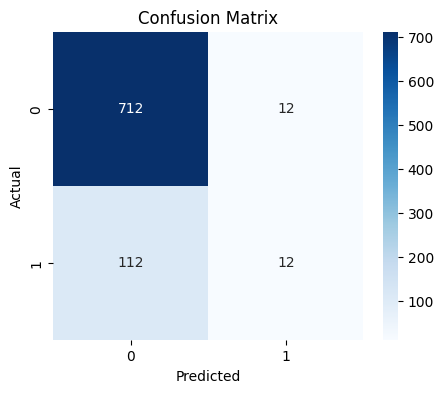

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# ... (same code as before)

# Create an AdaBoost classifier
abc = AdaBoostClassifier(n_estimators=100)

# Train the model
abc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_abc = abc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_abc)
precision = precision_score(y_test, y_pred_abc)
recall = recall_score(y_test, y_pred_abc)
f1 = f1_score(y_test, y_pred_abc)
conf_matrix = confusion_matrix(y_test, y_pred_abc)

# Print the results
print("AdaBoost Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()